<p>To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.</p>


<p>1.Importing Libraries and Reading the Dataset</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

In [3]:

df = pd.read_csv("D:\\machine-learning\\score\\Admission_Predict.csv",sep = ",")

In [4]:
print('There are ',len(df.columns),'columns')
for c in df.columns:
    sys.stdout.write(str(c)+', ')

There are  9 columns
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

<p>Some important information:</p>
<ul>
   <li> There are 9 columns: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit </li>
   <li>There are no null records. It's good. </li>
   <li> There are 400 samples in total. That's enough. </li>

</ul>

In [5]:
df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<p>Dataset overview:</p>
<ul>
  <li>  It was used to find the number of samples and the number of features.</li>
  <li> There is no string or null data.</li>
  <li>  Data types are int64 and float64.</li>
  <li>  Memory usage: 28.2 KB</li>
</ul>

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


<p>df.head() and df.tail():</p>
   <ul>
    <li>They are good to test if a feature is useful for future works.</li>
    <li>Serial No. may be deleted because it stores index values. In the future this column does not benefit.</li>
   </ul>



#### Correlation between All Columns


<ul>

   <li> The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE</li>
   <li> The 3 least important features for admission to the Master: Research, LOR, and SOP</li>

</ul>

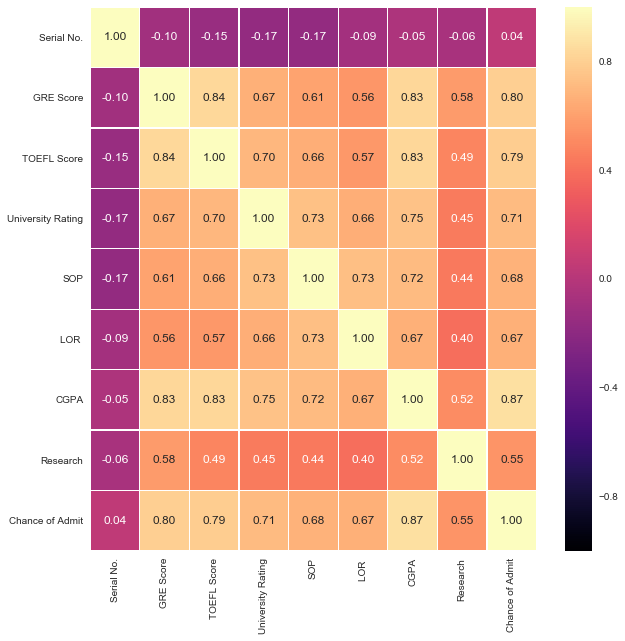

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap='magma')
plt.show()


#### DATA VISUALIZATION TO UNDERSTAND THE DATASET

<p>Having Research or not:</p>
    <ul>
   <li> The majority of the candidates in the dataset have research experience.</li>
   <li>Therefore, the Research will be a unimportant feature for the Chance of Admit. The correlation between Chance of Admit and Research was already lower than other correlation values.</li>
     </ul>


Not Having Research: 181
Having Research: 219


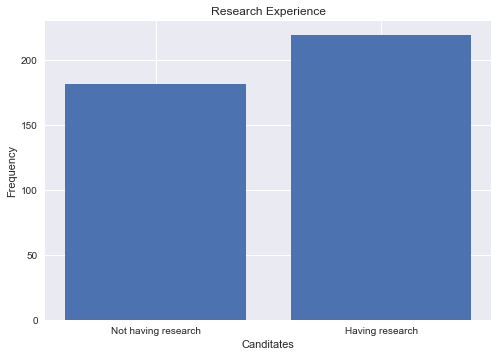

In [11]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = np.arange(2)
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.xticks(x,('Not having research','Having research'))
plt.show()





<p>TOEFL Score:</p>
<ul>
    <li>The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.</li>
</ul>


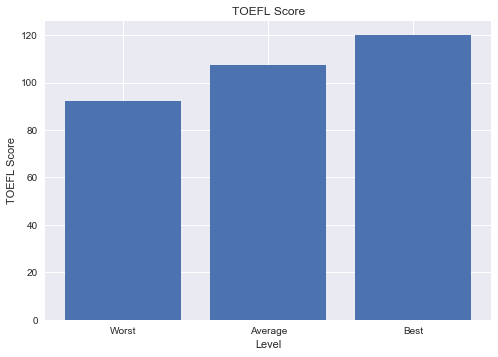

In [12]:
y = np.array([df['TOEFL Score'].min(),df['TOEFL Score'].mean(),df['TOEFL Score'].max()])
x = np.arange(3)
plt.bar(x,y)
plt.title('TOEFL Score')
plt.xlabel('Level')
plt.ylabel('TOEFL Score')
plt.xticks(x,('Worst','Average','Best'))
plt.show()



<p>GRE Score:</p>
   <ul>
   <li> This histogram shows the frequency for GRE scores.</li>
   <li>There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.</li>

   

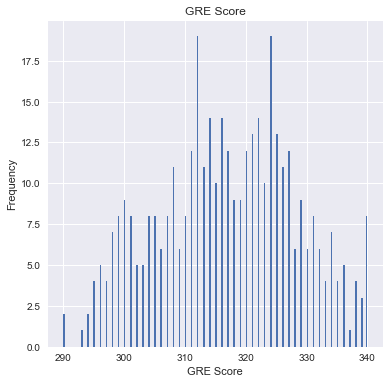

In [13]:
df['GRE Score'].plot(kind='hist',bins=200,figsize=(6,6))
plt.title('GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()



<p>CGPA Scores for University Ratings:</p>
<ul>
    <li>As the quality of the university increases, the CGPA score increases.</li>
</ul>


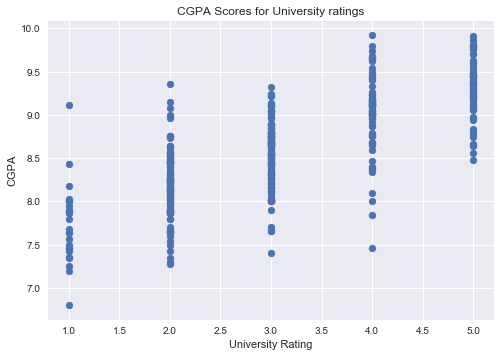

In [14]:
plt.scatter(df['University Rating'],df['CGPA'])
plt.title('CGPA Scores for University ratings')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

<ul><li>Candidates with high GRE scores usually have a high CGPA score.</li></ul>

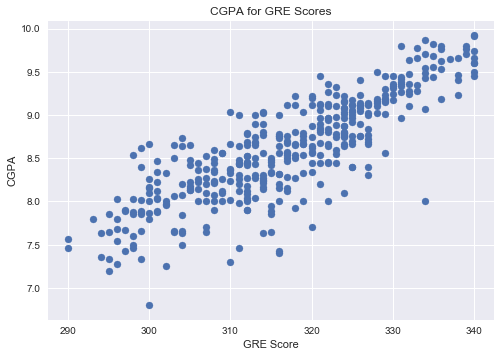

In [15]:
plt.scatter(df['GRE Score'],df['CGPA'])
plt.title('CGPA for GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

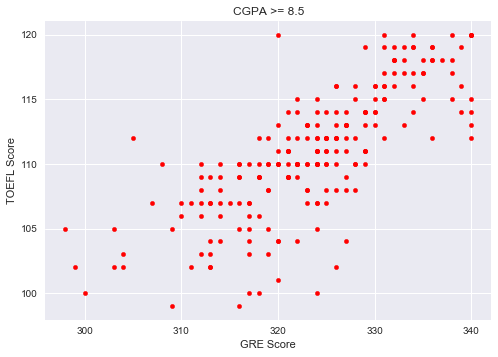

In [18]:
df[df['CGPA']>=8.5].plot(kind='scatter',x='GRE Score',y='TOEFL Score',color='red')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('CGPA >= 8.5')
plt.grid(True)
plt.show()

<ul><li>Candidates who graduate from good universities are more fortunate to be accepted</li></ul>

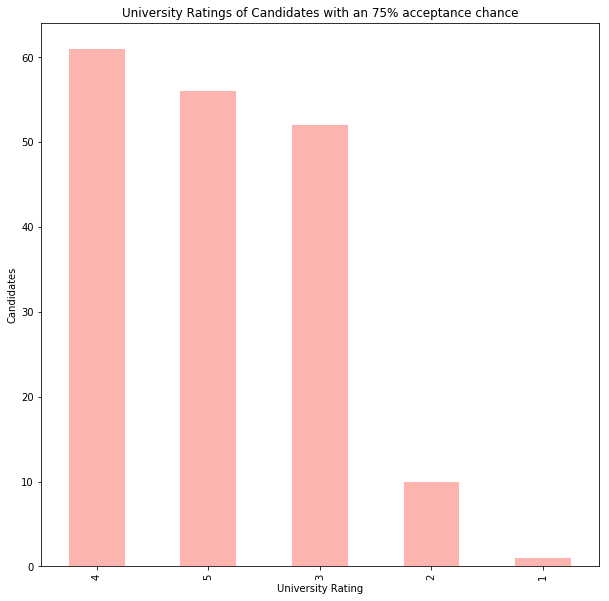

In [7]:
s = df[df['Chance of Admit'] >= 0.75]['University Rating'].value_counts().head(5)
plt.title('University Ratings of Candidates with an 75% acceptance chance')
s.plot(kind='bar',figsize=(10,10),cmap='Pastel1')
plt.xlabel('University Rating')
plt.ylabel('Candidates')
plt.show()

<ul><li>Candidates with high CGPA scores usually have a high SOP score.</li></ul>

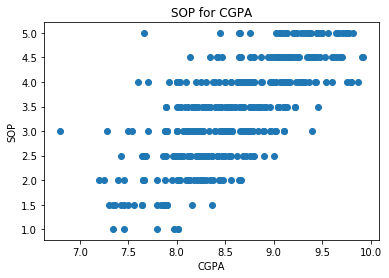

In [8]:
plt.scatter(df['CGPA'],df['SOP'])
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.title('SOP for CGPA')
plt.show()

<ul><li>Candidates with high GRE scores usually have a high SOP score.</li></ul>

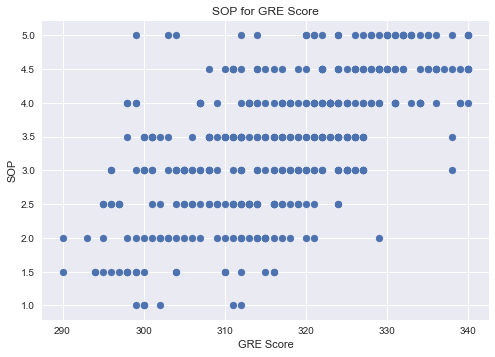

In [22]:
plt.scatter(df['GRE Score'],df['SOP'])
plt.xlabel('GRE Score')
plt.ylabel('SOP')
plt.title('SOP for GRE Score')
plt.show()


### REGRESSION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS


<p>Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.</p>

In [9]:
df = pd.read_csv('D:\\machine-learning\\score\\Admission_Predict.csv',sep=',')

serialNO = df['Serial No.'].values

df.drop(['Serial No.'],axis=1,inplace=True)
df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})



<p>train_test_split:</p>
<ul>
    <li>It splits the data into random train (80%) and test (20%) subsets.</li>
</ul>


In [10]:
y = df['Chance of Admit'].values
x = df.drop(['Chance of Admit'],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



<p>Normalization (min-max scaling):</p>
<ul>
    <li>It makes values scaled to a fixed range (0-1).</li>
</ul>


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaleX = MinMaxScaler(feature_range=[0,1])
x_train[x_train.columns] = scaleX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaleX.fit_transform(x_test[x_test.columns])


D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda\lib\site-packages\sklearn



<p>Note about r2_score:</p>
<ul>
    <li>It is the regression score function.</li>
    <li>The best possible score is 1.0 for r2_score.</li>
    <li>It may be negative.</li>
</ul>


### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print('Real value of y_test[1]: '+str(y_test[1]) + ' -> predict value: ' + str(lr.predict(x_test.iloc[[1],:])))
print('Real value of y_test[2]: '+str(y_test[2]) + ' -> predict value: ' + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print('r_square score: ',r2_score(y_test,y_head_lr))
y_head_lr_train = lr.predict(x_train)
print('r_square score(train data):',r2_score(y_train,y_head_lr_train))

Real value of y_test[1]: 0.68 -> predict value: [0.68053465]
Real value of y_test[2]: 0.9 -> predict value: [0.93536576]
r_square score:  0.8024719081557208
r_square score(train data): 0.7951946003191085


### Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000,random_state=42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test)

print('Real value of y_test[1]: '+str(y_test[1]) + ' -> predict value: ' + str(rfr.predict(x_test.iloc[[1],:])))
print('Real value of y_test[2]: '+str(y_test[2]) + ' -> predict value: ' + str(rfr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print('r_square score: ',r2_score(y_test,y_head_rfr))
y_head_rfr_train = rfr.predict(x_train)
print('r_square score(train data):',r2_score(y_train,y_head_rfr_train))

Real value of y_test[1]: 0.68 -> predict value: [0.67922]
Real value of y_test[2]: 0.9 -> predict value: [0.94014]
r_square score:  0.755943243151333
r_square score(train data): 0.9648359073500846


### Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
y_head_dt = dt.predict(x_test)

print('Real value of y_test[1]: '+str(y_test[1]) + ' -> predict value: ' + str(dt.predict(x_test.iloc[[1],:])))
print('Real value of y_test[2]: '+str(y_test[2]) + ' -> predict value: ' + str(dt.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print('r_square score: ',r2_score(y_test,y_head_dt))
y_head_dt_train = dt.predict(x_train)
print('r_square score(train data):',r2_score(y_train,y_head_dt_train))

Real value of y_test[1]: 0.68 -> predict value: [0.7]
Real value of y_test[2]: 0.9 -> predict value: [0.94]
r_square score:  0.7213278917162573
r_square score(train data): 1.0


#### Comparison of Regression Algorithms

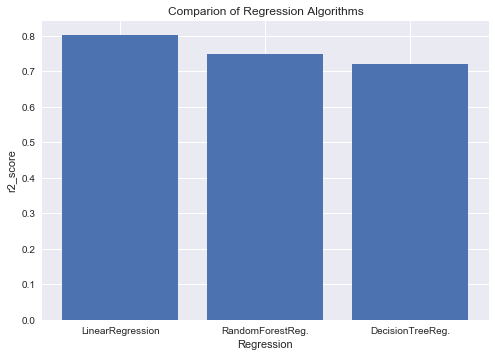

In [38]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dt)])
x = np.arange(3)
plt.bar(x,y)
plt.title('Comparion of Regression Algorithms')
plt.xlabel('Regression')
plt.ylabel('r2_score')
plt.xticks(x,("LinearRegression","RandomForestReg.","DecisionTreeReg."))
plt.show()

<ul><li>These are the regression estimates for samples with 5 and 50 indexes:</li></ul>

In [39]:
print('Real value of y_test[5]: '+str(y_test[5]) + ' -> predict value: ' + str(lr.predict(x_test.iloc[[5],:])))
print('Real value of y_test[5]: '+str(y_test[5]) + ' -> predict value: ' + str(rfr.predict(x_test.iloc[[5],:])))
print('Real value of y_test[5]: '+str(y_test[5]) + ' -> predict value: ' + str(dt.predict(x_test.iloc[[5],:])))

print('\n')

print('Real value of y_test[50]: '+str(y_test[50]) + ' -> predict value: ' + str(lr.predict(x_test.iloc[[50],:])))
print('Real value of y_test[50]: '+str(y_test[50]) + ' -> predict value: ' + str(rfr.predict(x_test.iloc[[50],:])))
print('Real value of y_test[50]: '+str(y_test[50]) + ' -> predict value: ' + str(dt.predict(x_test.iloc[[50],:])))

Real value of y_test[5]: 0.94 -> predict value: [0.92508488]
Real value of y_test[5]: 0.94 -> predict value: [0.914]
Real value of y_test[5]: 0.94 -> predict value: [0.92]


Real value of y_test[50]: 0.86 -> predict value: [0.88575614]
Real value of y_test[50]: 0.86 -> predict value: [0.8997]
Real value of y_test[50]: 0.86 -> predict value: [0.91]




<p>This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:</p>


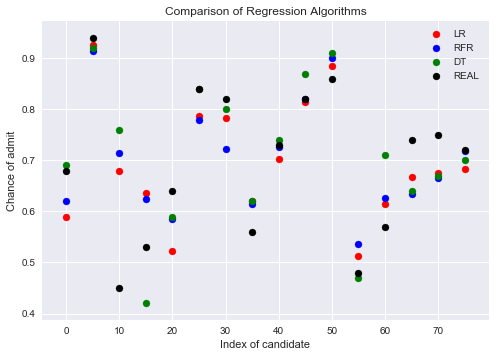

In [40]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color='red')
blue = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color='blue')
green = plt.scatter(np.arange(0,80,5),y_head_dt[0:80:5],color='green')
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color='black')
plt.title('Comparison of Regression Algorithms')
plt.xlabel('Index of candidate')
plt.ylabel('Chance of admit')
plt.legend([red,blue,green,black],['LR','RFR','DT','REAL'])
plt.show()



<p>Comment:</p>
<ul>
    <li>Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted.</li>
</ul>


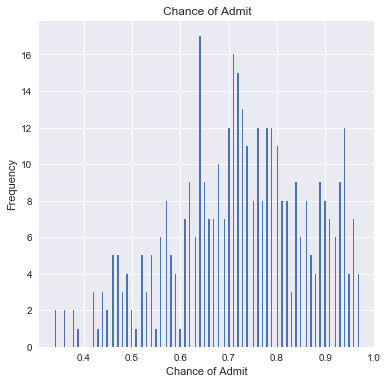

In [41]:
df['Chance of Admit'].plot(kind='hist',bins=200,figsize=(6,6))
plt.title('Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()

#### Preparing Data for Classification
<ul>

     If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
     If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.
</ul>


In [14]:
df = pd.read_csv('D:\\machine-learning\\score\\Admission_Predict.csv',sep=',')

SerialNO = df['Serial No.'].values
df.drop(['Serial No.'],axis=1,inplace=True)

df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})
y = df['Chance of Admit'].values
x = df.drop(['Chance of Admit'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaleX = MinMaxScaler(feature_range=[0,1])
x_train[x_train.columns] = scaleX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaleX.fit_transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01 = [1 if each > 0.8 else 0 for each in y_test]

y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Da

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,



<p>Note about score:</p>
   <ul>
    <li>It is the mean accuracy for test data and labels.</li>
    </ul>
<p>Note about precision:</p>
<ul>
    <li>precision = TP / (TP + FP)</li>
</ul>
<p>Note about recall:</p>
<ul>
    <li>recall = TP / (TP + FN)</li>
</ul>
<p>Note about F!:</p>
<ul>
    <li>F1 = 2 / ((1/precision)+(1/recall))</li>
 </ul>

### Logistic Regression



<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
    <li>Predicted 1: 22</li>
    <li>Predicted 0: 7</li>
    <li>According to Confusion Matrix, the model predicted that 23 candidate's Chances of Admit are greater than 80%. In reality, 22 of them have a Chance of Admit greater than 80%. In total, 29 candidate's Chances of Admit are greater than 80%.</li>
</ul>

<p>For Actual 0: 51</p>
<ul>
    <li>Predicted 1: 1</li>
    <li>Predicted 0: 50</li>
    <li>According to Confusion Matrix, the model predicted that 57 candidate's Chances of Admit are less than or equal to 80%. In reality, 50 of them have a Chance of Admit less than or equal to 80%. In total, 51 candidate's Chances of Admit are less than or equal to 80%.</li>
</ul>


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score:  0.9125
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


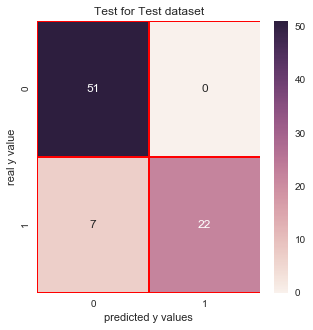

precision_score is :  1.0
recall_score is :  0.7586206896551724
f1_score is :  0.8627450980392156


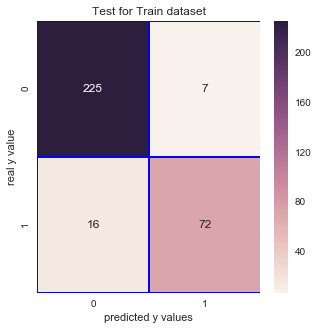

In [50]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(x_train,y_train_01)
print('score: ',lrc.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(lrc.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(lrc.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,lrc.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_lrc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,lrc.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,lrc.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,lrc.predict(x_test)))

# Test for Train Dataset:

cm_lrc_train = confusion_matrix(y_train_01,lrc.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_lrc_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

### Support Vector Machine



<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
   <li> Predicted 1: 22</li>
   <li> Predicted 0: 7</li>
</ul>
<p>For Actual 0: 51</p>
<ul>
    <li>Predicted 1: 1</li>
    <li>Predicted 0: 50</li>
</ul>


D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score:  0.9
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


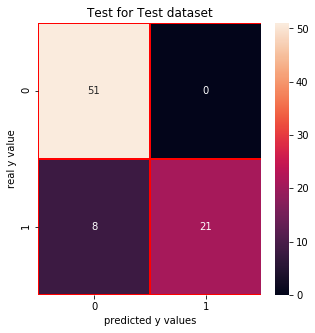

precision_score is :  1.0
recall_score is :  0.7241379310344828
f1_score is :  0.8400000000000001


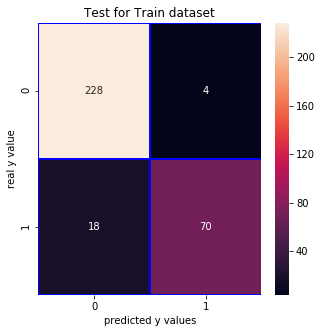

In [16]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train_01)
print('score: ',svm.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(svm.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(svm.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,svm.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,svm.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,svm.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,svm.predict(x_test)))

# Test for Train Dataset:

cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

### Gaussian Naive Bayes



<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
    <li>Predicted 1: 28</li>
    <li>Predicted 0: 1</li>
</ul>
<p>For Actual 0: 51</p>
<ul>
    <li>Predicted 1: 2</li>
    <li>Predicted 0: 49</li>
</ul>


score:  0.9375
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


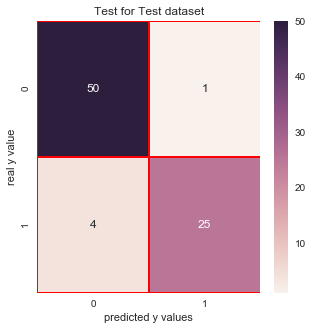

precision_score is :  0.9615384615384616
recall_score is :  0.8620689655172413
f1_score is :  0.9090909090909091


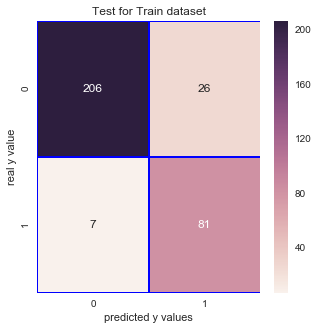

In [55]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train_01)
print('score: ',nb.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(nb.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(nb.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,nb.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_nb,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,nb.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,nb.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,nb.predict(x_test)))

# Test for Train Dataset:

cm_nb_train = confusion_matrix(y_train_01,nb.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_nb_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


### Decision Tree Classification




<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
   <li> Predicted 1: 26</li>
   <li> Predicted 0: 3</li>
</ul>
<p>For Actual 0: 51</p>
<ul>
    <li> Predicted 1: 1</li>
    <li>Predicted 0: 50</li>
</ul>


score:  0.9125
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


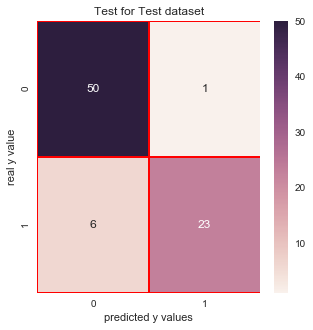

precision_score is :  0.9583333333333334
recall_score is :  0.7931034482758621
f1_score is :  0.8679245283018867


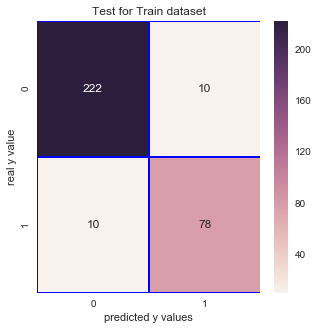

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(x_train,y_train_01)
print('score: ',dtc.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(dtc.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(dtc.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01,dtc.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dtc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,dtc.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,dtc.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,dtc.predict(x_test)))

# Test for Train Dataset:

cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dtc_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

### Random Forest Classification



<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
    <li>Predicted 1: 25</li>
    <li>Predicted 0: 4</li>
</ul>
<p>For Actual 0: 51</p>
<ul>
    <li>Predicted 1: 1</li>
    <li>Predicted 0: 50</li>
</ul>


score:  0.9375
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


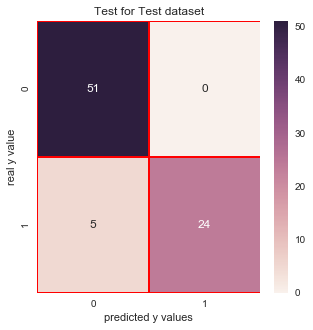

precision_score is :  1.0
recall_score is :  0.8275862068965517
f1_score is :  0.9056603773584906


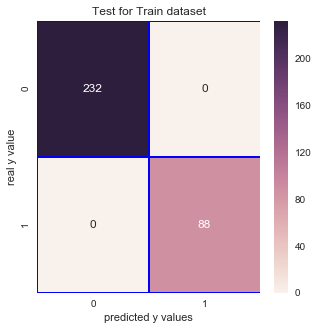

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=1)
rfc.fit(x_train,y_train_01)
print('score: ',rfc.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(rfc.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(rfc.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01,rfc.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rfc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,rfc.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,rfc.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,rfc.predict(x_test)))

# Test for Train Dataset:

cm_rfc_train = confusion_matrix(y_train_01,rfc.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rfc_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()



### K Nearest Neighbors Classification



<p>Finding the k value:</p>
<ul>
    <li>As a result of the test, the best k value is 3.</li>
</ul>
<p>Confusion Matrix:</p>

<p>For Actual 1: 29</p>
<ul>
   <li> Predicted 1: 26 </li>
   <li> Predicted 0: 3 </li>
</ul>
<p>For Actual 0: 51</p>
<ul>
    <li>Predicted 1: 2 </li>
    <li>Predicted 0: 49 </li>
</ul>


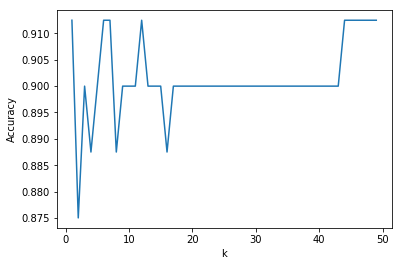

score 3 :  0.9125
Real value of y_test_01[1]: 0 -> predict value: [0]
Real value of y_test_01[2]: 1 -> predict value: [1]


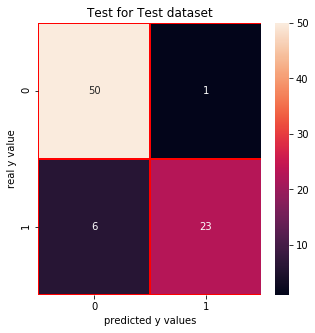

precision_score is :  0.9583333333333334
recall_score is :  0.7931034482758621
f1_score is :  0.8679245283018867


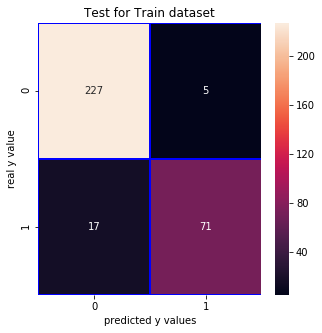

In [19]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train_01)
print('score 3 : ',knn.score(x_test,y_test_01))
print('Real value of y_test_01[1]: '+str(y_test_01[1]) + ' -> predict value: ' + str(knn.predict(x_test.iloc[[1],:])))
print('Real value of y_test_01[2]: '+str(y_test_01[2]) + ' -> predict value: ' + str(knn.predict(x_test.iloc[[2],:])))

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.title('Test for Test dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()

from sklearn.metrics import recall_score,precision_score,f1_score
print('precision_score is : ',precision_score(y_test_01,knn.predict(x_test)))
print('recall_score is : ',recall_score(y_test_01,knn.predict(x_test)))
print('f1_score is : ',f1_score(y_test_01,knn.predict(x_test)))

# Test for Train Dataset:

cm_knn_train = confusion_matrix(y_train_01,knn.predict(x_train))
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn_train,annot=True,linewidths=0.5,linecolor='blue',fmt='.0f',ax=ax)
plt.title('Test for Train dataset')
plt.xlabel('predicted y values')
plt.ylabel('real y value')
plt.show()


### Comparison of Classification Algorithms

<p>All classification algorithms achieved around 90% success.</p>
<p>The most successful one is Gaussian Naive Bayes with 96% score.</p>

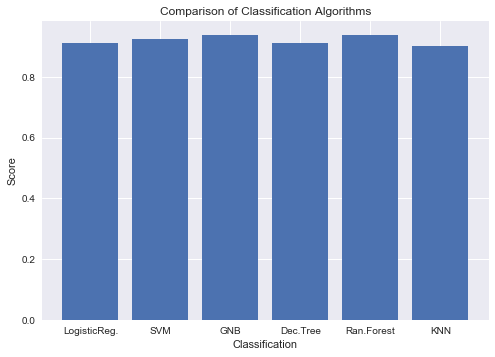

In [68]:
y = np.array([lrc.score(x_test,y_test_01),svm.score(x_test,y_test_01),nb.score(x_test,y_test_01),
              dtc.score(x_test,y_test_01),rfc.score(x_test,y_test_01),knn.score(x_test,y_test_01)])
x = np.arange(6)
plt.bar(x,y)
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Classification')
plt.ylabel('Score')
plt.xticks(x,("LogisticReg.","SVM","GNB","Dec.Tree","Ran.Forest","KNN"))
plt.show()

### CLUSTERING ALGORITHMS (UNSUPERVISED MACHINE LEARNING ALGORITHMS)

#### Preparing Data for Clustering

In [12]:
df = pd.read_csv('D:\\machine-learning\\score\\Admission_Predict.csv',sep=',')
df = df.rename(columns={'Chance of Admit ':'Chance of Admit'})
serialNo = df['Serial No.']
df.drop(['Serial No.'],axis=1,inplace=True)
df = (df - np.min(df)) / (np.max(df)-np.min(df))
y = df['Chance of Admit']
x = df.drop(['Chance of Admit'],axis=1)


<p>Principal Component Analysis</p>

<p>* All features (x) were collected in one feature with Principal Component Analysis.</p>


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1,whiten=True)
pca.fit(x)
x_pca = pca.transform(x)
x_pca = x_pca.reshape(400)
dictionary = {'x':x_pca,'y':y}
data = pd.DataFrame(dictionary)
print('pca data:',data.head())

print()

print('orin data:',df.head())

pca data:           x         y
0 -1.377553  0.920635
1 -0.919033  0.666667
2 -0.320986  0.603175
3 -0.520960  0.730159
4  1.137743  0.492063

orin data:    GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0       0.94     0.928571               0.75  0.875  0.875  0.913462   
1       0.68     0.535714               0.75  0.750  0.875  0.663462   
2       0.52     0.428571               0.50  0.500  0.625  0.384615   
3       0.64     0.642857               0.50  0.625  0.375  0.599359   
4       0.48     0.392857               0.25  0.250  0.500  0.451923   

   Research  Chance of Admit  
0       1.0         0.920635  
1       1.0         0.666667  
2       1.0         0.603175  
3       1.0         0.730159  
4       0.0         0.492063  


### K-means Clustering

<ul><li>The elbow method is used to determine the best number of clusters for k-means clustering. The number is 3.</li></ul>

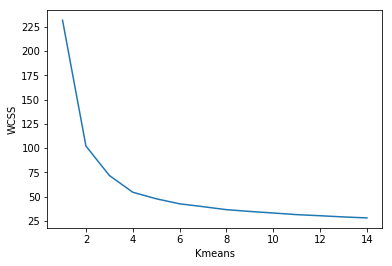

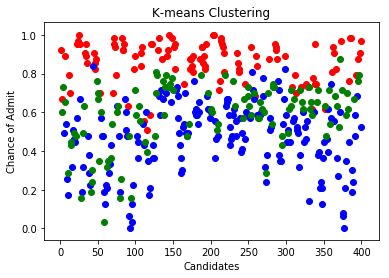

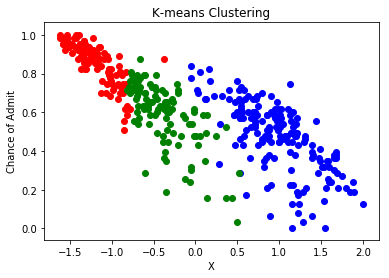

In [14]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.xlabel('Kmeans')
plt.ylabel('WCSS')
plt.show()

df["Serial No."] = serialNo
kmeans = KMeans(n_clusters=3)
clusters_knn = kmeans.fit_predict(x)
df['label_kmeans'] = clusters_knn


plt.scatter(df[df.label_kmeans == 0 ]["Serial No."],df[df.label_kmeans == 0]['Chance of Admit'],color = "red")
plt.scatter(df[df.label_kmeans == 1 ]["Serial No."],df[df.label_kmeans == 1]['Chance of Admit'],color = "blue")
plt.scatter(df[df.label_kmeans == 2 ]["Serial No."],df[df.label_kmeans == 2]['Chance of Admit'],color = "green")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

plt.scatter(data.x[df.label_kmeans == 0 ],data[df.label_kmeans == 0].y,color = "red")
plt.scatter(data.x[df.label_kmeans == 1 ],data[df.label_kmeans == 1].y,color = "blue")
plt.scatter(data.x[df.label_kmeans == 2 ],data[df.label_kmeans == 2].y,color = "green")
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Chance of Admit")
plt.show()

### Hierarchical Clustering¶


<ul><li>The dendrogram method is used to determine the best number of clusters for hierarchical clustering. The number is 3 again.</li></ul>

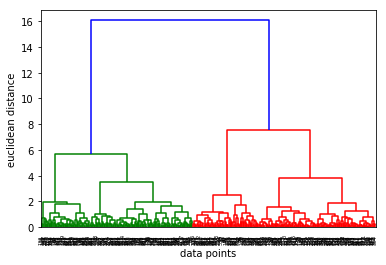

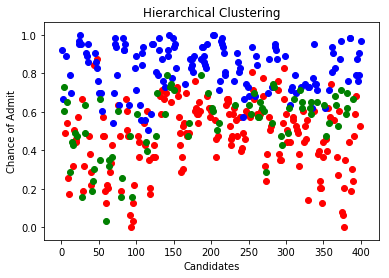

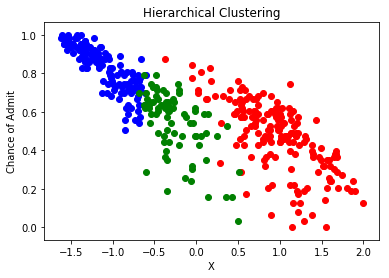

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(x,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clusters_hiyerartical = hiyerartical_cluster.fit_predict(x)
df['label_hiyerartical'] = clusters_hiyerartical

plt.scatter(df[df.label_hiyerartical == 0 ]["Serial No."],df[df.label_hiyerartical == 0]['Chance of Admit'],color = "red")
plt.scatter(df[df.label_hiyerartical == 1 ]["Serial No."],df[df.label_hiyerartical == 1]['Chance of Admit'],color = "blue")
plt.scatter(df[df.label_hiyerartical == 2 ]["Serial No."],df[df.label_hiyerartical == 2]['Chance of Admit'],color = "green")
plt.title('Hierarchical Clustering')
plt.xlabel('Candidates')
plt.ylabel('Chance of Admit')
plt.show()

plt.scatter(data[df.label_hiyerartical == 0].x,data.y[df.label_hiyerartical==0],color='red')
plt.scatter(data[df.label_hiyerartical == 1].x,data.y[df.label_hiyerartical==1],color='blue')
plt.scatter(data[df.label_hiyerartical == 2].x,data.y[df.label_hiyerartical==2],color='green')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Chance of Admit')
plt.show()

### Comparison of Clustering Algorithms

<ul><li>K-means Clustering and Hierarchical Clustering are similarly.</li></ul>

### THE THREE IMPORTANT FEATURES

<p>Correlation between All Columns</p>
<ul>
    <li>The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE</li>
    <li>The 3 least important features for admission to the Master: Research, LOR, and SOP</li>
</ul>


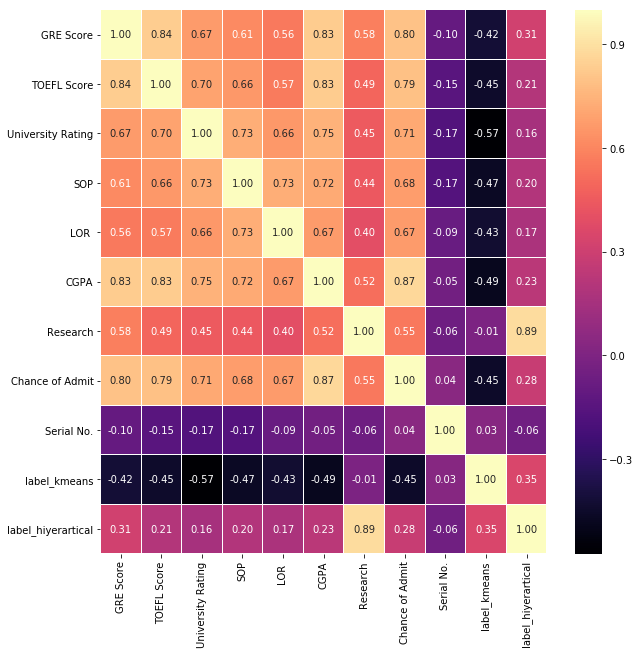

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap='magma')
plt.show()

#### The Three Features for Linear Regression

In [23]:
df = pd.read_csv('D:\\machine-learning\\score\\Admission_Predict.csv',sep=',')
df = df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df_new = pd.DataFrame()
df_new['GRE Score'] = df['GRE Score']
df_new['CGPA'] = df['CGPA']
df_new['TOEFL Score'] = df['TOEFL Score']
df_new['Chance of Admit'] = df['Chance of Admit']

y_new = df_new['Chance of Admit']
x_new = df_new.drop(['Chance of Admit'],axis=1)

from sklearn.model_selection import train_test_split

x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

# from sklearn.preprocessing import MinMaxScaler
# scaleX = MinMaxScaler(feature_range=[0,1])
# x_train_new[x_train_new.columns] = scaleX.fit_transform(x_train_new[x_train_new.columns])
# x_test_new[x_test_new.columns] = scaleX.fit_transform(x_test_new[x_test_new.columns])


from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(x_train_new,y_train_new)
y_head_lr_new = lr_new.predict(x_test_new)

from sklearn.metrics import r2_score
print('r2 score: ',r2_score(y_test_new,y_head_lr_new))

r2 score:  0.7962198319810165
